# Z test in ads Click Through Rate

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, zscore
from statsmodels.stats.weightstats import ztest


In [2]:
# read data
df=pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ab_testing/advertisement_clicks.csv')
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [3]:
# data exploration
df.info()
df.advertisement_id.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   advertisement_id  2000 non-null   object
 1   action            2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


advertisement_id
B    1000
A    1000
Name: count, dtype: int64

## Compare the means and str between Ads A and Ads B

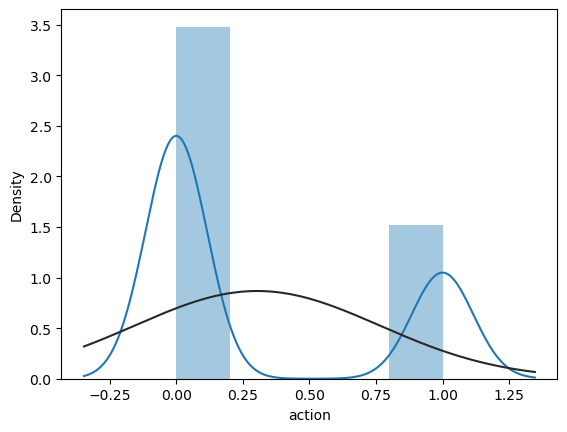

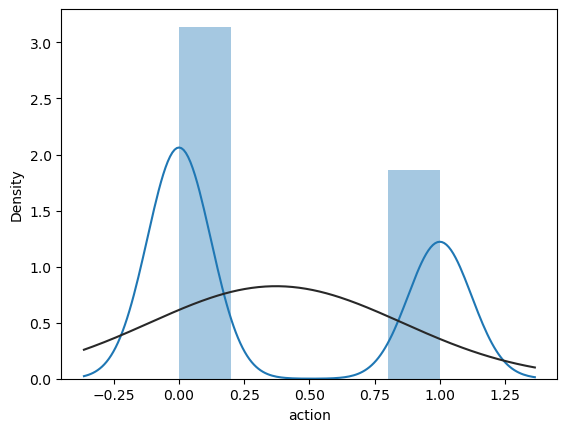

In [4]:
ad_a=df[df['advertisement_id']=='A']
ad_b=df[df['advertisement_id']=='B']

# check the distribution of the data
sns.distplot(ad_a['action'], fit=norm)
plt.show()

sns.distplot(ad_b['action'], fit=norm)
plt.show()

In [5]:
# calculate the means and variance for both ads a and ads b
mean_a=ad_a['action'].mean()
mean_b=ad_b['action'].mean()
var_a=ad_a['action'].var()
var_b=ad_b['action'].var()

# print them out
print('mean_a: ', mean_a)
print('mean_b: ', mean_b)
print('var_a: ', var_a)
print('var_b: ', var_b)

mean_a:  0.304
mean_b:  0.372
var_a:  0.21179579579579272
var_b:  0.23384984984985163


- Explanation of mean here  
a. mean_a: CTR of sample ad_a  
b. mean_b: CTR of sample ad_b

# Hypothesis
## Ztest function
### Hypothesis 1: one-side ad_a has a larger CTR than ad_b
**Null hypothesis**: ad_a has a larger CTR than ad b  
**Alternative hypothesis**: ad_a doesn't have a larger CTR than ad b  

In [6]:
# calculate the z-score
z_test, pval = ztest(ad_a['action'], ad_b['action'],alternative='larger')

# print the result
print('ztest: ', z_test)
print('pval: ', pval)

ztest:  -3.2211732138019786
pval:  0.9993616651849235


In [7]:
# explain the result
if pval < 0.05:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')
    

Accept the null hypothesis


### Hypothesis 2: one-side ad_a has a 20% larger CTR than ad_b
**Null hypothesis**: ad_a has a 20% larger CTR than ad b  
**Alternative hypothesis**: ad_a doesn't have a 20% larger CTR than ad b 

In [8]:
# calculate the z-score to test if ad_a is 20% larger than ad_b in mean
z_score, p_val = ztest(ad_a['action'], ad_b['action'], value=0.2, alternative='larger')

# print the result
print('z_score: ', z_score)
print('p_val: ', p_val)



z_score:  -12.695212077925445
p_val:  1.0


In [9]:
# explain the result
if p_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')


Accept the null hypothesis


## Manual calculation
### one-sided test

The mathematical equation for calculating the z-score in a two-sample z-test is:

z = (x̄₁ - x̄₂ - Δ) / √(s₁²/n₁ + s₂²/n₂)

where:
- x̄₁ and x̄₂ are the sample means of the two samples being compared
- s₁² and s₂² are the sample variances of the two samples being compared
- n₁ and n₂ are the sample sizes of the two samples being compared
- Δ is the hypothesized difference between the population means (in the second case, 0.2)

The z-score measures the number of standard deviations that the difference between the sample means is from the hypothesized difference. A large z-score indicates that the difference between the sample means is unlikely to have occurred by chance, and provides evidence against the null hypothesis.

The p-value is then calculated using the standard normal distribution. In the case of a one-sided test where we are testing if ad_a is (20%) larger than ad_b in mean, we use the cumulative distribution function (cdf) of the standard normal distribution to calculate the probability of observing a z-score as extreme or more extreme than the one calculated. The p-value is then calculated as 1 minus this probability.

In [10]:
# use math to calculate the z-score and pvalue of one-sided test
z_test = (mean_a - mean_b) / np.sqrt(var_a / ad_a['action'].size + var_b / ad_b['action'].size)
# calculate the p-value
pval = 1 - norm.cdf(z_test)
# print the result
print('z_score: ', z_test)
print('p_val: ', pval)

z_score:  -3.221173213801983
p_val:  0.9993616651849235


the result is the same as the one we got from statsmodels.stats.weightstats.ztest

In [11]:
# use math to calculate the z-score and pvalue of one-sided test ad_a is 20% larger than ad_b in mean
z_score = (mean_a - mean_b - 0.2) / np.sqrt(var_a / ad_a['action'].size + var_b / ad_b['action'].size)
# calculate the p-value
p_val = 1 - norm.cdf(z_score)
# print the result
print('z_score: ', z_score)
print('p_val: ', p_val)




z_score:  -12.695212077925461
p_val:  1.0


the result is the same as the one we got from statsmodels.stats.weightstats.ztest

### two-sided test

In a one-sided test, also known as a directional test, the null hypothesis specifies the direction of the effect, while in a two-sided test, also known as a non-directional test, the null hypothesis does not specify the direction of the effect.

To use the code in a one-sided test where we are testing if ad_a is 20% larger than ad_b in mean, you can keep the code as is. The `p_val` variable will give you the p-value for a one-sided test.

To use the code in a two-sided test where we are testing if ad_a is different from ad_b in mean, you need to modify the code to calculate the p-value differently. Specifically, you need to calculate the probability of observing a z-score as extreme or more extreme than the one calculated in either direction (i.e., greater than or less than the hypothesized difference). This can be done by multiplying the p-value by 2. Here's an example of how to modify the code for a two-sided test:



In [12]:
# use math to calculate the z-score and pvalue of two-sided test ad_a is different from ad_b in mean
z_score = (mean_a - mean_b) / np.sqrt(var_a / ad_a['action'].size + var_b / ad_b['action'].size)
# calculate the p-value
p_val = 2 * (1 - norm.cdf(abs(z_score)))
# print the result
print('z_score: ', z_score)
print('p_val: ', p_val)

z_score:  -3.221173213801983
p_val:  0.0012766696301529379




In this modified code, the `p_val` variable is multiplied by 2 to account for the probability of observing a z-score as extreme or more extreme than the one calculated in either direction. The `abs()` function is used to take the absolute value of the z-score, since we are interested in the magnitude of the difference between the sample means, not the direction.

# Sample size

To calculate the sample size needed for a two-sample z-test, you can use the following formula:

n = (2 * (σ1^2 + σ2^2) * (Zα/2 + Zβ)^2) / (μ1 - μ2)^2

where:
- n is the sample size needed for each group
- σ1^2 and σ2^2 are the variances of the two groups
- Zα/2 is the critical value of the standard normal distribution for a two-tailed test at the desired significance level α (e.g., 1.96 for α = 0.05)
- Zβ is the critical value of the standard normal distribution for the desired power (e.g., 0.84 for 80% power)
- μ1 and μ2 are the means of the two groups

In the code you provided, the sample size is calculated using a slightly different formula that assumes a 20% difference in means between the two groups. This formula is:

`sample_size = np.ceil(2 * (var_a + var_b) * (norm.ppf(1 - 0.05 / 2) / 0.2) ** 2)`

where:
- var_a and var_b are the variances of the two groups
- norm.ppf(1 - 0.05 / 2) is the critical value of the standard normal distribution for a two-tailed test at the 0.05 significance level (i.e., 1.96)
- 0.2 is the hypothesized difference in means between the two groups

To calculate the sample size using the first formula, you would need to know the variances, means, and desired significance level and power. To calculate the sample size using the second formula, you only need to know the variances and the hypothesized difference in means.

In [13]:
# calculate the sample size for two-sided test

sample_size = np.ceil(2 * (var_a + var_b) * (norm.ppf(1 - 0.05 / 2) / 0.2) ** 2)
# print the result
print('sample_size: ', sample_size)

sample_size:  86.0


In [14]:
# calculate the sample size for one-sided test
sample_size = np.ceil((var_a + var_b) * (norm.ppf(1 - 0.05) / 0.2) ** 2)
# print the result
print('sample_size: ', sample_size)

sample_size:  31.0


# Power - Type II error

The formula for calculating the power of a two-sample z-test is:

Power = 1 - β = 1 - P(Type II error)

where:
- β is the probability of a Type II error (i.e., failing to reject the null hypothesis when it is false)
- Power is the probability of correctly rejecting the null hypothesis when it is false

The power of a two-sample z-test depends on several factors, including the sample size, the effect size (i.e., the difference between the population means), the significance level (α), and the variance of the population.

There is no simple formula for calculating the power of a two-sample z-test, but it can be estimated using statistical software or online calculators. The power can also be calculated using simulation methods, where the test is repeated many times with different sample sizes and effect sizes to estimate the probability of correctly rejecting the null hypothesis.